# Инициализация среды, загрузка библиотек

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
#import os

In [4]:
#os.getcwd()
#os.chdir('../../!_Spec')

In [5]:
file_name = r'GB_Data_Analyst_Interim_certification_2023-08_v02.xlsx'
dataset_name_crm_data = 'Data_CRM'
dataset_name_marketing = 'Data_Marketing'
dataset_name_merge = 'Merge_CRM_and_Marketing'

# Загрузка и оценка данных

In [6]:
df_data_merge = pd.read_excel(file_name,\
                            sheet_name=dataset_name_merge)

In [7]:
df_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66162 entries, 0 to 66161
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Column1                                     66162 non-null  int64         
 1   ID_M                                        66162 non-null  int64         
 2   ID_C                                        66162 non-null  int64         
 3   Data_Marketing.ID                           66162 non-null  int64         
 4   Data_Marketing.Client_ID                    66162 non-null  object        
 5   Data_Marketing.Domain                       66162 non-null  object        
 6   Data_Marketing.City                         66162 non-null  object        
 7   Data_Marketing.Region                       66162 non-null  object        
 8   Data_Marketing.Browser                      66162 non-null  object        
 9   Data_M

In [8]:
# Часть данных имеют пропуски. Основные данные пропусков не имеют.

In [9]:
print('Количество уникальных идентификаторов клиентов :', df_data_merge['Data_Marketing.Client_ID'].nunique())

Количество уникальных идентификаторов клиентов : 40052


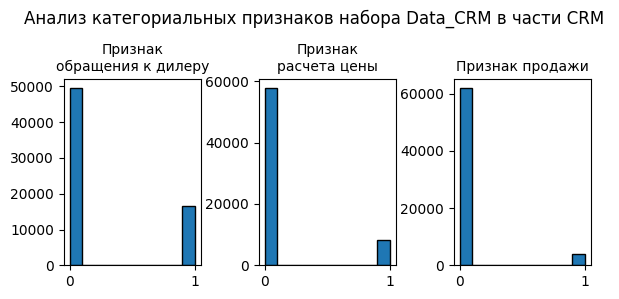

In [10]:
title_font_size = 10
feature_list = (('Data_CRM.Tag_ComingToDealer','Признак\nобращения к дилеру'),
                ('Data_CRM.Tag_ModelCalc','Признак\nрасчета цены' ),
                ('Data_CRM.Tag_Sale', 'Признак продажи'))

fig, axs = plt.subplots(nrows=1, ncols=len(feature_list), figsize=(6,3))
fig.tight_layout()
fig.suptitle(f'Анализ категориальных признаков набора {dataset_name_crm_data} в части CRM ')
for i, el in enumerate(feature_list):
    #print(i, el)
    axs[i].hist(df_data_merge[el[0]], edgecolor = 'black' )
    axs[i].set_title(el[1], fontsize = title_font_size)
    axs[i].locator_params(axis='x', nbins= df_data_merge[el[0]].nunique())

fig.subplots_adjust(top=.75);
# настройка интервалов - https://www.codecamp.ru/blog/matplotlib-subplot-spacing/?ysclid=llxn417opa580441617

# Анализ данных

## Регионы с наибольшим количеством заявок

In [11]:
# Под заявкой будем считать показатель конверсии

In [12]:
# Выведем TOP10 регионов с наибольшим количеством заявок
df_data_merge[(df_data_merge['Data_Marketing.Conversion']==1) &
               (df_data_merge['Data_Marketing.Region'] != '(not set)')].groupby(by='Data_Marketing.Region').\
    agg({'Data_Marketing.Conversion':'sum'}).\
    sort_values(by=['Data_Marketing.Conversion'], ascending=[False]).reset_index().\
    rename(columns={'Data_Marketing.Region':'Region','Data_Marketing.Conversion':'Conversion'}).\
    head().\
    style.format({"Conversion": "{:_.0f}"})    

,Region,Conversion
0,Krasnodar Krai,23_849
1,Stavropol Krai,1_642
2,Rostov Oblast,1_160
3,Moscow,1_036
4,Crimea,667


## Средний процент отказов

В набор данных добавлен вычисляемый столбец "Data_Marketing.Tag_Bounce",принимающий значения:
  - 1 - если признак конверсии равен 0 и колиечество просмотренных страниц равно 1;
  - 0 - для остальных случаев.<br>
 Причина: 
  - низкое качество заполнения колонки длительности сессии;
  - непонятные значения в колонке "Bounce_Rate"

### Средний  процент отказа в разрезе источников траффика.

In [13]:
df_data_merge.groupby(by='Data_Marketing.Source').\
    agg({'Data_Marketing.Tag_Bounce':'mean'}).\
    sort_values(by=['Data_Marketing.Tag_Bounce'], ascending=[False]).reset_index().\
    rename(columns={'Data_Marketing.Source':'Source','Data_Marketing.Tag_Bounce':'Bounce_Rate'}).head(10)\
    .style.format({"Bounce_Rate": "{:,.2%}"})

,Source,Bounce_Rate
0,yandex_go_search,0.97%
1,google_go_search,0.29%
2,cars.BMW-keyauto-krd.ru,0.08%
3,BMW-keyauto-krd.ru,0.06%
4,(direct),0.05%
5,yandex,0.04%
6,yandex.ru,0.04%
7,google,0.02%
8,krasnodar.spravker.ru,0.00%
9,m.facebook.com,0.00%


### Средний процент отказа в разрезе регионов

In [14]:
df_data_merge[(df_data_merge['Data_Marketing.Region'] != '(not set)')].groupby(by='Data_Marketing.Region').\
    agg({'Data_Marketing.Tag_Bounce':'mean'}).\
    sort_values(by=['Data_Marketing.Tag_Bounce'], ascending=[False]).reset_index().\
    rename(columns={'Data_Marketing.Region':'Region','Data_Marketing.Tag_Bounce':'Bounce_Rate'}).head(10)\
    .style.format({"Bounce_Rate": "{:,.2%}"})

,Region,Bounce_Rate
0,Donetsk Oblast,1.03%
1,Kabardino-Balkaria,0.37%
2,Chechnya,0.31%
3,Moscow Oblast,0.17%
4,Krasnodar Krai,0.05%
5,Moscow,0.05%
6,Stavropol Krai,0.03%
7,Punjab,0.00%
8,Pskov Oblast,0.00%
9,Provence-Alpes-Cote d'Azur,0.00%


## С каких устройств чаще всего заходят на сайт

In [15]:
pd.pivot_table(df_data_merge.rename(columns={'Data_Marketing.Device_Category':'Device_Category'}),
               index='Device_Category', values='Data_Marketing.Client_ID',
               aggfunc='count').div(len(df_data_merge.index)).mul(100)\
                                             .rename(columns={'Data_Marketing.Client_ID':'Rating, %'})

,"Rating, %"
Device_Category,
desktop,37.226807
mobile,59.649043
tablet,3.124150


## Какие источники наиболее конвертируемые

In [16]:
pd.pivot_table(df_data_merge.rename(columns={'Data_Marketing.Source':'Source'}),
               index='Source', values='Data_Marketing.Conversion',
               aggfunc='sum')\
    .div(df_data_merge['Data_Marketing.Conversion'].sum()).mul(100)\
    .rename(columns={'Data_Marketing.Conversion':'Rating, %'}).sort_values(by='Rating, %', ascending=False).head(15)

,"Rating, %"
Source,
google,27.566373
yandex.ru,17.158599
yandex,15.242333
(direct),14.500651
BMW-keyauto-krd.ru,12.566222
google_go_search,3.202858
IG,2.334030
cars.BMW-keyauto-krd.ru,1.658947
go.mail.ru,1.207883


## Расчет ROMI

ROMI: Return on Marketing Investment — возврат маркетинговых инвестиций.

ROMI = (Выручка / Расходы на маркетинг) - 1
источник: https://vc.ru/marketing/319094-razbor-roi-romi-roas-i-ih-uproshchennaya-formula?ysclid=llzceuw4ar685851949

Расчет выручки:
  - Рассчитаем объем выручки исходя из цены авто в рублях, для записей, имеющих признак продажи. Для записей, с признаком продажи не имеющим стоимости авто, заполним значение стоимости средневзвешенным значением цены.
  - Расходы на маркетинг рассчитаем по источникам трафика исходя из цены за клик (предположительной):
      * referral - 2 руб.;
      * organic - 0 руб.;
      * cpc - 0,10 руб.;
      * cpm - 0,15 руб.;
      * sem-cpc - 0,3 руб.

### Заполним пропуски цены медианным значением цены для сделок, закончившихся продажей.

In [17]:
df_data_merge['Price_RUR_avg'] = df_data_merge['Data_Marketing.Ref_Models_Price_RUR']

In [18]:
df_data_merge.loc[(df_data_merge['Data_CRM.Tag_Sale'] == 1) &
             (df_data_merge['Data_Marketing.Ref_Models_Price_RUR'].isna()),'Price_RUR_avg'] = \
    round(df_data_merge.loc[(df_data_merge['Data_CRM.Tag_Sale'] == 1) &
             (~df_data_merge['Data_Marketing.Ref_Models_Price_RUR'].isna()),
                  'Data_Marketing.Ref_Models_Price_RUR'].median(),2)

In [19]:
# проверим
df_data_merge.loc[(df_data_merge['Data_CRM.Tag_Sale'] == 1) &
             (df_data_merge['Data_Marketing.Ref_Models_Price_RUR'].isna()),
                  ['Data_CRM.Tag_Sale','Data_Marketing.Ref_Models_Price_RUR','Price_RUR_avg']].head()

,Data_CRM.Tag_Sale,Data_Marketing.Ref_Models_Price_RUR,Price_RUR_avg
57,1,NaN,3850000.0
68,1,NaN,3850000.0
77,1,NaN,3850000.0
79,1,NaN,3850000.0
112,1,NaN,3850000.0


In [20]:
# cформируем массив со стоимостью траффика и определим средние значения для пропусков.
df_traffic_price = pd.DataFrame(df_data_merge['Data_Marketing.Medium'].value_counts()).rename(columns={'Data_Marketing.Medium':'Medium'})
df_traffic_price['Medium_Price'] = [2.0, 0.0, np.NaN, 0.1 , 0.3, 0.15, np.NaN]
df_traffic_price.loc[df_traffic_price['Medium_Price'].isna(), 'Medium_Price'] = \
    (df_traffic_price['Medium'] * df_traffic_price['Medium_Price']).sum()/df_traffic_price['Medium'].sum()
df_traffic_price.reset_index(inplace=True)
df_traffic_price.drop(['Medium'], axis= 1 , inplace= True)
df_traffic_price.rename(columns={'index':'Medium'} , inplace= True)
df_traffic_price

,Medium,Medium_Price
0,referral,2.000000
1,organic,0.000000
2,(none),0.754989
3,cpc,0.100000
4,sem_cpc,0.300000
5,cpm,0.150000
6,(not set),0.754989


In [21]:
revenue = round(df_data_merge[(df_data_merge['Data_CRM.Tag_Sale'] == 1)]['Price_RUR_avg'].sum(),2)
print(f" Revenue : {revenue : _.2f} руб")

 Revenue :  16_232_120_201.57 руб


In [22]:
cac = round(df_data_merge.merge(df_traffic_price, how='left',left_on='Data_Marketing.Medium', right_on='Medium')\
                    ['Medium_Price'].sum(),2)
print(f" CAC : {cac : _.2f} руб.")

 CAC :  57_082.47 руб.


#### Рассчитаем ROMI

In [23]:
print(f"ROMI : {round(revenue/cac - 1,4) : _.4f} ед")

ROMI :  284_361.6108 ед


## Рассчет выручки по долларовым позициям

In [24]:
print(f"Выручка по долларовым позициям: {round(df_data_merge[df_data_merge['Data_Marketing.Ref_Models_CurrencyCode_Str'] == 'USD']['Price_RUR_avg'].sum(),2) :_.2f} руб.")

Выручка по долларовым позициям: 13_522_225_404.70 руб.


## Наиболее выгодный источник траффика

Определение выгодности источника траффика можно определить по критериям, например:<br> 
- на основании показателя ROMI, рассчитанного в разрезе источников траффика;<br>
- на основании показателя выручки;<br>
- на основании показателя маржинальности.

In [25]:
df_revenue_by_source = \
df_data_merge[(df_data_merge['Data_CRM.Tag_Sale'] == 1)]\
    .rename(columns={'Data_Marketing.Source':'Source','Price_RUR_avg':'Revenue'})\
    .groupby('Source').agg({'Revenue':'sum'}).sort_values(by=['Revenue'], ascending=[False]).reset_index()
df_revenue_by_source.head().style.format({"Revenue": "{:_.2f}"})

,Source,Revenue
0,google,4_482_338_731.16
1,yandex.ru,2_760_728_467.72
2,yandex,2_565_867_123.27
3,(direct),2_360_473_802.80
4,BMW-keyauto-krd.ru,2_093_846_239.53


In [26]:
df_cac_by_source = \
df_data_merge.merge(df_traffic_price, how='left',left_on='Data_Marketing.Medium', right_on='Medium')\
    .rename(columns={'Data_Marketing.Source':'Source','Medium_Price':'CAC'})\
    .groupby('Source').agg({'CAC':'sum'}).sort_values(by=['CAC'], ascending=[False]).reset_index()
df_cac_by_source

,Source,CAC
0,yandex.ru,22702.00000
1,BMW-keyauto-krd.ru,16544.00000
2,(direct),7114.26388
3,cars.BMW-keyauto-krd.ru,2382.00000
4,go.mail.ru,1674.00000
...,...,...
83,bing,0.00000
84,yahoo,0.00000
85,duckduckgo,0.00000
86,tut.by,0.00000


In [27]:
# объединим таблицы
df_romi_by_source = df_cac_by_source.merge(df_revenue_by_source, how='outer', on=['Source'])
df_romi_by_source.head(10).style.format({"CAC": "{:_.0f}", "Revenue": "{:_.0f}"})

,Source,CAC,Revenue
0,yandex.ru,22_702,2_760_728_468
1,BMW-keyauto-krd.ru,16_544,2_093_846_240
2,(direct),7_114,2_360_473_803
3,cars.BMW-keyauto-krd.ru,2_382,271_179_051
4,go.mail.ru,1_674,142_100_000
5,Mersedes.ru,1_436,178_785_256
6,carsdo.ru,1_436,186_158_101
7,google_go_search,631,524_600_000
8,yandex,486,2_565_867_123
9,BMW.ru,238,28_400_000


In [28]:
# удалим строки с отсутствующими данными
df_romi_by_source = \
df_romi_by_source[~((df_romi_by_source['CAC'] == 0) &
                                      ((df_romi_by_source['Revenue'].isna()) |
                                       (df_romi_by_source['Revenue'] == 0)))]
df_romi_by_source

,Source,CAC,Revenue
0,yandex.ru,22702.00000,2.760728e+09
1,BMW-keyauto-krd.ru,16544.00000,2.093846e+09
2,(direct),7114.26388,2.360474e+09
3,cars.BMW-keyauto-krd.ru,2382.00000,2.711791e+08
4,go.mail.ru,1674.00000,1.421000e+08
...,...,...,...
81,msk.autoneva.ru,2.00000,NaN
82,search.visymo.com,2.00000,NaN
83,bing,0.00000,9.900000e+06
84,yahoo,0.00000,1.815000e+07


In [29]:
df_romi_by_source.loc[(df_romi_by_source['CAC'].isna()) | (df_romi_by_source['Revenue'].isna()),
                      ['CAC', 'Revenue']].fillna(0, inplace=True)
df_romi_by_source

,Source,CAC,Revenue
0,yandex.ru,22702.00000,2.760728e+09
1,BMW-keyauto-krd.ru,16544.00000,2.093846e+09
2,(direct),7114.26388,2.360474e+09
3,cars.BMW-keyauto-krd.ru,2382.00000,2.711791e+08
4,go.mail.ru,1674.00000,1.421000e+08
...,...,...,...
81,msk.autoneva.ru,2.00000,NaN
82,search.visymo.com,2.00000,NaN
83,bing,0.00000,9.900000e+06
84,yahoo,0.00000,1.815000e+07


In [30]:
if 'romi' in df_romi_by_source.columns.to_list():
    df_romi_by_source.drop(['romi'], axis=1, inplace=True)
df_romi_by_source.loc[:,'romi'] = (df_romi_by_source['Revenue']/df_romi_by_source['CAC']) - 1

In [31]:
df_romi_by_source.style.format({"CAC": "{:_.0f}", "Revenue": "{:_.0f}"})

,Source,CAC,Revenue,romi
0,yandex.ru,22_702,2_760_728_468,121606.279875
1,BMW-keyauto-krd.ru,16_544,2_093_846_240,126561.272699
2,(direct),7_114,2_360_473_803,331793.524741
3,cars.BMW-keyauto-krd.ru,2_382,271_179_051,113844.109387
4,go.mail.ru,1_674,142_100_000,84885.499403
5,Mersedes.ru,1_436,178_785_256,124501.267563
6,carsdo.ru,1_436,186_158_101,129635.560669
7,google_go_search,631,524_600_000,831509.540498
8,yandex,486,2_565_867_123,5276304.003640
9,BMW.ru,238,28_400_000,119326.731092


Наблюдаем, что по показателю ROMI источники можно разделить на три категории:
- абсолютно эффективные источники: нет затрат - есть выручка, сравнение по объему выручки;
- источники для которых существуют затраты и выручка - сравнение по ROMI;
- абсолютно неэффективные источники - нет выручки - есть затраты нет выручки, сравнение по объему затрат;
- бесполезные нет выручки, нет затрат (отброшены на предыдушем шаге).

### Абсолютно эффективные

In [32]:
df_romi_by_source[df_romi_by_source['CAC'] == 0][['Source', 'CAC', 'Revenue']]\
    .sort_values(by=['Revenue'], ascending=[False])\
    .rename(columns={'CAC':'CAC, руб.', 'Revenue':'Revenue, руб.'})\
    .reset_index(drop=True)\
    .style.format({"CAC, руб.": "{:_.2f}", "Revenue, руб.": "{:_.2f}"})

,Source,"CAC, руб.","Revenue, руб."
0,rambler,0.00,25_400_000.00
1,yahoo,0.00,18_150_000.00
2,bing,0.00,9_900_000.00


### Источники для которых определены затраты и выручка

In [33]:
df_romi_by_source[(df_romi_by_source['Revenue'] != 0) & df_romi_by_source['CAC'] != 0 ]\
    [['Source', 'CAC', 'Revenue','romi']]\
    .sort_values(by=['romi'], ascending=[False])\
    .rename(columns={'CAC':'CAC, руб.', 'Revenue':'Revenue, руб.','romi':'ROMI'})\
    .reset_index(drop=True)\
    .style.format({"CAC, руб.": "{:_.2f}", "Revenue, руб.": "{:_.2f}"})

,Source,"CAC, руб.","Revenue, руб.",ROMI
0,google,149.15,4_482_338_731.16,30051549.760285
1,yandex,486.30,2_565_867_123.27,5276304.003640
2,krd.rusdealers.ru,2.00,3_850_000.00,1924999.000000
3,IG,237.30,300_300_000.00,1265485.725664
4,adguard.com,4.00,3_850_000.00,962499.000000
5,google.com,22.00,19_093_429.19,867882.145000
6,google_go_search,630.90,524_600_000.00,831509.540498
7,yandex_go_search,92.70,56_100_000.00,605176.993528
8,110km.ru,15.85,7_700_000.00,485657.117057
9,yandex.fr,26.00,12_350_000.00,474999.000000


### Абсолютно неэффективные источники

In [34]:
df_romi_by_source[df_romi_by_source['Revenue'] == 0][['Source', 'CAC', 'Revenue']]\
    .sort_values(by=['CAC'], ascending=[False])\
    .rename(columns={'CAC':'CAC, руб.', 'Revenue':'Revenue, руб.'})\
    .reset_index(drop=True)\
    .style.format({"CAC, руб.": "{:_.2f}", "Revenue, руб.": "{:_.2f}"})

,Source,"CAC, руб.","Revenue, руб."


### <b>Исходя из вышеобозначенных критериев, наиболее эффективным является источник google</b>

## Каких данных не хватает, чтобы посчитать чистую прибыль?

### Согласно методике очистки доходов, используемой в Unit экономике, не хватает постоянных расходов

## Прогноз до конца февраля по количеству конверсий на каждый день.

In [110]:
import math
import datetime

In [56]:
from sklearn.linear_model import LinearRegression

In [92]:
df_conversion_by_date = \
df_data_merge[['Data_Marketing.Date','Data_Marketing.Conversion']]\
              .groupby('Data_Marketing.Date').sum('Data_Marketing.Conversion')\
              .sort_values(by=['Data_Marketing.Date'])\
              .reset_index()\
              .rename(columns={'Data_Marketing.Date':'Date','Data_Marketing.Conversion':'Conversion'})
df_conversion_by_date

,Date,Conversion
0,2020-01-01,445
1,2020-01-02,609
2,2020-01-03,678
3,2020-01-04,672
4,2020-01-05,642
5,2020-01-06,579
6,2020-01-07,688
7,2020-01-08,700
8,2020-01-09,733
9,2020-01-10,790


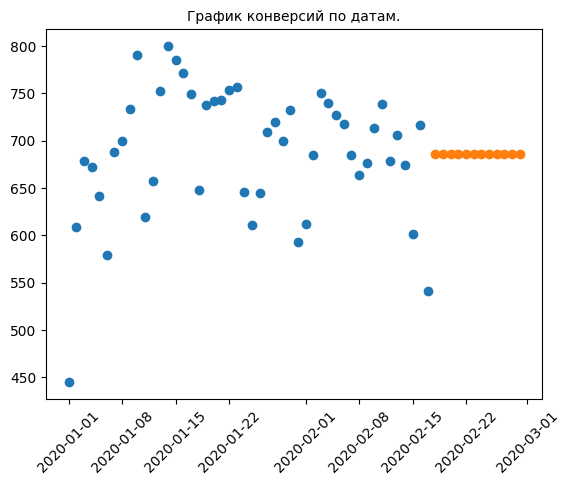

In [127]:

plt.scatter(df_conversion_by_date['Date'], df_conversion_by_date['Conversion'])
plt.scatter(df_conversion_by_date_pred['Date'], df_conversion_by_date_pred['Conversion'])
plt.title(f'График конверсий по датам.', size=10)
plt.xticks(rotation=45);

In [93]:
x = np.array(df_conversion_by_date['Date'].dt.strftime("%Y%m%d").astype(int).to_list()).reshape(-1, 1)
y = np.array(df_conversion_by_date['Conversion'].to_list()).reshape(-1, 1)

In [94]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [105]:
x_pred = np.array(list(range(20200218, 20200230))).reshape(-1, 1)
x_pred

array([[20200218],
       [20200219],
       [20200220],
       [20200221],
       [20200222],
       [20200223],
       [20200224],
       [20200225],
       [20200226],
       [20200227],
       [20200228],
       [20200229]])

In [106]:
y_pred = model.predict(x_pred)

In [107]:
y_pred

array([[686.20030034],
       [686.17152641],
       [686.14275248],
       [686.11397855],
       [686.08520462],
       [686.05643068],
       [686.02765675],
       [685.99888282],
       [685.97010889],
       [685.94133496],
       [685.91256102],
       [685.88378709]])

In [135]:
df_conversion_by_date_pred = pd.DataFrame({'Date':x_pred.flatten(),'Conversion':y_pred.flatten()})
df_conversion_by_date_pred.loc[:,'Conversion'] = df_conversion_by_date_pred['Conversion'].round(0)
df_conversion_by_date_pred.loc[:,'Date'] = pd.to_datetime(df_conversion_by_date_pred['Date'], format='%Y%m%d')
df_conversion_by_date_pred.astype({'Conversion':'int32'}).dtypes

Date          datetime64[ns]
Conversion             int32
dtype: object

### Прогнозные значения конверсии по дням

In [137]:
df_conversion_by_date_pred

,Date,Conversion
0,2020-02-18,686.0
1,2020-02-19,686.0
2,2020-02-20,686.0
3,2020-02-21,686.0
4,2020-02-22,686.0
5,2020-02-23,686.0
6,2020-02-24,686.0
7,2020-02-25,686.0
8,2020-02-26,686.0
9,2020-02-27,686.0


## Прогноз выручки за первый квартал

In [36]:
# Продажи по дням за все дни, содержащиеся в датасете.
df_data_merge[df_data_merge['Data_CRM.Tag_Sale'] == 1][['Price_RUR_avg','Data_Marketing.Date']]\
.groupby('Data_Marketing.Date').sum('Price_RUR_avg').sort_values(by=['Data_Marketing.Date'])\
.reset_index()

,Data_Marketing.Date,Price_RUR_avg
0,2020-01-01,1.430572e+08
1,2020-01-02,2.529500e+08
2,2020-01-03,3.339353e+08
3,2020-01-04,3.391081e+08
4,2020-01-05,3.857000e+08
5,2020-01-06,2.969705e+08
6,2020-01-07,3.932558e+08
7,2020-01-08,3.322000e+08
8,2020-01-09,4.071496e+08
9,2020-01-10,3.228205e+08


### Для расчета используем данные за последние 30 дней, т.к. первые дни января являются праздничными и их нежелательно использовать в прогнозе

In [37]:
revenue_1q = \
(df_data_merge[(df_data_merge['Data_CRM.Tag_Sale'] == 1) & 
                             (df_data_merge['Data_Marketing.Date'] < '2020-01-16')]\
     [['Price_RUR_avg']].sum() * 3).values[0]
print(f"Прогнозная выручка за 1 кв. {revenue_1q : _.2f} руб.")

Прогнозная выручка за 1 кв.  14_942_197_360.95 руб.


## Сформируем файл для объединения сессий в цепочки, приводящие к продаже.

In [ ]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [177]:
from ipywidgets import IntProgress
from IPython.display import display
import time

In [193]:
df_data_merge.iloc[0]

Column1                                                                 0
ID_M                                                                62966
ID_C                                                                41627
Data_Marketing.ID                                                   62966
Data_Marketing.Client_ID                      GA1.2.1000037439.1576672694
Data_Marketing.Domain                                  BMW-keyauto-krd.ru
Data_Marketing.City                                                 Yalta
Data_Marketing.Region                                              Crimea
Data_Marketing.Browser                                          YaBrowser
Data_Marketing.Device_Category                                    desktop
Data_Marketing.Date                                   2020-01-17 00:00:00
Data_Marketing.Pageviews                                                2
Data_Marketing.Campaign                                         (not set)
Data_Marketing.Keyword                

In [225]:
df_chains = pd.DataFrame(columns=['ID_M','Chain'])
prgBar = IntProgress(min = 1, max = df_data_merge.shape[0]); # Создаем прогрессбар
#display(prgBar)
chain: int = 0
count: int = 1
client_id_prev: str = ''
conversion_prev: int = -1
df_len = len(df_data_merge)
for i, r in df_data_merge.sort_values(by=['Data_Marketing.Client_ID','Data_Marketing.Date','Data_Marketing.Conversion',
                                  'Data_CRM.Tag_ComingToDealer','Data_CRM.Tag_ModelCalc',
                                  'Data_CRM.Tag_Sale'], ascending=[True, True, True, True, True, True]).iterrows():
    #print(f"Client_ID_prev")
    if conversion_prev == 1 or \
        r['Data_Marketing.Client_ID'] != client_id_prev:
        chain += 1
    df_chains.loc[len(df_chains.index)] = [r['ID_M'], chain]    
    client_id_prev = r['Data_Marketing.Client_ID']
    conversion_prev =  r['Data_Marketing.Conversion']
#    if prgBar.value >= 1000 and prgBar.value % 1000 == 0: print(prgBar.value)
#    if prgBar.value == 150: break
    prgBar.value += 1
    
    

In [226]:
df_chains.merge(df_data_merge, how='left', on='ID_M')[['ID_M','Chain','Data_Marketing.Client_ID',
                                                         'Data_Marketing.Date','Data_Marketing.Conversion']].head(50)

,ID_M,Chain,Data_Marketing.Client_ID,Data_Marketing.Date,Data_Marketing.Conversion
0,62966,1,GA1.2.1000037439.1576672694,2020-01-17,1
1,63209,2,GA1.2.1000100466.1580498751,2020-01-31,0
2,27570,3,GA1.2.1000144581.1577322293,2020-01-01,0
3,38137,4,GA1.2.1000154585.1581097166,2020-02-07,1
4,23927,5,GA1.2.1000156589.1580366503,2020-01-30,1
5,5419,6,GA1.2.1000156620.1572694079,2020-01-10,0
6,5440,6,GA1.2.1000156620.1572694079,2020-01-10,0
7,60576,7,GA1.2.1000292707.1579328888,2020-01-18,1
8,15266,8,GA1.2.1000341704.1580586777,2020-02-01,0
9,2516,9,GA1.2.1000357178.1578084558,2020-01-03,1


In [227]:
#import os
#os.getcwd()

In [229]:
with pd.ExcelWriter('chains.xlsx', engine='xlsxwriter') as writer:
    # Write dataframe to new sheet
    df_chains.to_excel(writer, sheet_name='chains', index=False)
    
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

C:\Users\Alex\AppData\Local\Temp\ipykernel_6524\293378339.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
C:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
